In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [21]:
from proj1_helpers import *
from data_helpers import *
from implementations import *

In [22]:
#lOAD TRAIN DATA
DATA_TRAIN_PATH = 'data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [23]:
#CLEAN TRAIN DATA: delete columns with numerous undefined values
bounds = [0.0, 0.5]
tX_clean, ind_remov = treat_undefined_values(bounds, tX)
ind_remov

[4, 5, 6, 12, 26, 27, 28]

In [24]:
#MODEL BUILDING
tx, mean, std = standardize(tX_clean,0)
y, tx = build_model_data(tx,y)

In [25]:
num_samples = len(y)
num_features = tx.shape[1]

num_samples, num_features

(250000, 24)

## Ridge regression using normal equations:

### Linear regression

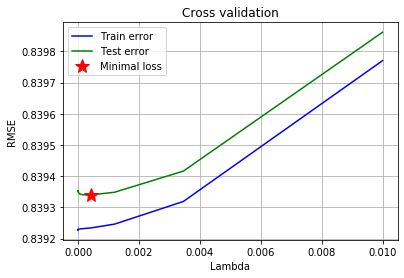

 Best value of lambda = 0.0004124626382901365 
 Loss = 0.8393400807674494 
 Weights = [-0.31440256  0.0309335  -0.25833265 -0.27093214 -0.02281768  0.27124568
 -0.03555087  0.02314085 -0.18873896  0.12465084  0.19043216 -0.00080423
 -0.00089797  0.28596836 -0.0009073   0.00228802  0.11737855  0.00081974
 -0.07359579  0.06264649  0.06562791 -0.01422376 -0.01348664 -0.08059052]


In [27]:
from cross_validation import cross_validation
from cost import compute_loss_rmse
from plots import *

lambdas = np.logspace(-20, -2, 40)
k_fold = 4
seed = 6

# prepare storage of the mean of the weights and rmse for train and test data
ws = np.zeros((num_features, len(lambdas)))
rmse_train = []
rmse_test = []

for ind, lambda_ in enumerate(lambdas):
    # prepare storage of weights and rmse for train and test data for each fold
    ws_tmp = np.zeros((num_features, k_fold))
    rmse_tr = []
    rmse_te = []
    # cross-validation
    for i,k in enumerate(range(k_fold)):
        tx_train, y_train, tx_test, y_test = cross_validation(y, tx, k, k_fold, seed)
        w,_ = ridge_regression(y_train, tx_train, lambda_)
        # store weights and rmse for train and test data for each fold
        ws_tmp[:, i] = w
        rmse_tr.append(compute_loss_rmse(y_train, tx_train, w))
        rmse_te.append(compute_loss_rmse(y_test, tx_test, w))
    # store the mean of the weights and rmse for train and test data
    ws[:, ind] = np.mean(ws_tmp, 1)
    rmse_train.append(np.mean(rmse_tr))
    rmse_test.append(np.mean(rmse_te))
    
loss = np.amin(rmse_test)
weights = ws[:, np.argmin(rmse_test)]
lambda_star = lambdas[np.argmin(rmse_test)]


plot_cross_validation(lambdas, "Lambda", lambda_star, rmse_train, rmse_test, loss)
print(" Best value of lambda = {g} \n Loss = {l} \n Weights = {we}".format(
    g=lambda_star, l=loss, we = weights))

### Polynomial regression

In [32]:
from cross_validation import cross_validation
from cost import ridge_loss
from plots import plot_cross_validation

degrees = 4
lambdas = np.logspace(-15, -1, 50)
k_fold = 2
seed = 6

Lambdas_star = []
Loss = []

for indices, degree in enumerate(range(1, degrees+1)):
    tx_augmented = build_poly_all_features(tx, degree)
                                                      
    # prepare storage of the mean of the weights and rmse for train and test data
    ws = np.zeros((tx_augmented.shape[1], len(lambdas)))
    rmse_train = []
    rmse_test = []
    accuracy_train = []
    accuracy_test = []
    
    for ind, lambda_ in enumerate(lambdas):
        # prepare storage of weights and rmse for train and test data for each fold
        ws_tmp = np.zeros((tx_augmented.shape[1], k_fold))
        rmse_tr = []
        rmse_te = []
        accuracy_tr = []
        accuracy_te = []
        # cross-validation
        for i,k in enumerate(range(k_fold)):
            tx_train, y_train, tx_test, y_test = cross_validation(y, tx_augmented, k, k_fold, seed)
            #ridge regression
            w,_ = ridge_regression(y_train, tx_train, lambda_)
            # store weights and rmse for train and test data for each fold
            ws_tmp[:, i] = w
            rmse_tr.append(ridge_loss(y_train, tx_train, w, lambda_))
            rmse_te.append(ridge_loss(y_test, tx_test, w, lambda_))
            accuracy_tr.append(predict_accuracy(y_train,tx_train,w))
            accuracy_te.append(predict_accuracy(y_test,tx_test,w))
        # store the mean of the weights and rmse for train and test data
        ws[:, ind] = np.mean(ws_tmp, 1)
        rmse_train.append(np.mean(rmse_tr))
        rmse_test.append(np.mean(rmse_te))
        accuracy_train.append(np.mean(accuracy_tr))
        accuracy_test.append(np.mean(accuracy_te))
            
    loss_train = np.amin(rmse_train)    
    loss_test = np.amin(rmse_test)
    training_accuracy = np.amin(accuracy_train)
    test_accuracy = np.amin(accuracy_test)
    weights = ws[:, np.argmin(accuracy_test)]
    lambda_star = lambdas[np.argmin(accuracy_test)]

    plot_cross_validation(lambdas, "Lambda", lambda_star, rmse_train, rmse_test, loss_test)
    print("Degree={d} Best value of lambda = {g} \n Train loss = {l_tr} Test loss = {l_te} Train accuracy = {tr_ac} Test accuracy = {te_ac} \n Weights = {we}".format(
        d=degree, g=lambda_star, l_tr=loss_train, l_te=loss_test, tr_ac=training_accuracy, te_ac=test_accuracy, we = weights))
    
    Lambdas_star.append(lambda_star)
    Accuracy.append(test_accuracy)
    

KeyboardInterrupt: 

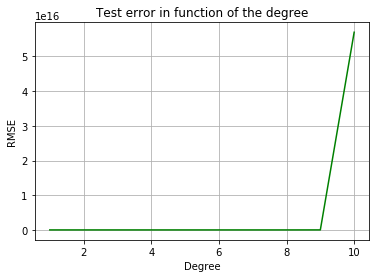

Best degree=1 Best value of lambda = 1e-15 
 Loss = 0.35227338818058185 
 Weights = [-3.14664000e-01  3.08157890e-02 -2.58822960e-01 -2.72765785e-01
 -2.51514284e-02  2.72765701e-01 -3.50975460e-02 -3.75305608e+02
 -1.90159809e-01  1.24802998e-01  7.28912327e+01 -7.95581431e-04
 -8.86537961e-04  7.18628594e+01 -8.92979471e-04  2.28779092e-03
  1.18215204e-01  8.10150028e-04 -7.38787984e-02  6.59532961e-02
  8.65313913e-02 -2.87904016e-02 -1.74587359e-02  3.17857902e+02]


In [28]:
plt.plot(range(1, degrees+1), Loss, color='g')
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("Test error in function of the degree")
plt.grid(True)
plt.show()

degree_star =  np.argmin(Accuracy) + 1
Accuracy_star = np.amin(Accuracy)
Lambda_star = Lambdas_star[np.argmin(Accuracy)]

TX_train = build_poly_all_features(tx, degree_star)
Weights_star,_ = ridge_regression(y, tx, Lambda_star)
print("Best degree={d} Best value of lambda = {g} \n Accuracy = {ac} \n Weights = {we}".format(
        d=degree_star, g=Lambda_star, ac=Accuracy_star, we = Weights_star))

In [29]:
#PREDICT TRAINING ACCURACY
training_accuracy = predict_accuracy(y,tx,Weights_star)
training_accuracy

66.2124

## Generate predictions and save ouput in csv format for submission:

In [27]:
DATA_TEST_PATH = 'data/test.csv'
ytest, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
tX_test_clean = np.delete(tX_test, ind_remove, axis=1)
_, tx_test = build_model_data(tX_test_clean,ytest)

In [28]:
OUTPUT_PATH = 'data/submission_ridge.csv'
y_pred = predict_labels(Weights_star, tx_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)